In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
class Perc ():
    def __init__(self,entrada,f=0,w0=-1,apz=0.1,vetori=[-0.5,0.5]):
        self.entrada = entrada
        self.entradas,self.saidas = self.conv_inp_out(entrada)
        self.total_entradas = len(self.entradas)
        self.x = f
        self.w0 = w0
        self.apz = apz
        self.pesos = []
        self.p0 = []
        self.vetori = vetori
        self.n_epc = 0
        self.n_ajust = 0
    
    def conv_inp_out (self,entrada):
        dado = 'data/data/'+str(entrada)
        data = np.fromfile(str(dado))
        N = 3
        saidas_a=[]
        d_data = [data[n:n+N].tolist() for n in range(0, len(data), N)]
        for i in d_data:
            saidas_a.append(i[-1])
            i.pop()
        entradas_a = d_data
        return (entradas_a,saidas_a)
    
    def treino(self):
        
        p1 = self.vetori[0]
        p2 = self.vetori[1]
        for i in range(3):
            r = rd.uniform(p1,p2)
            self.p0.append(r)
        w0  = np.array(self.w0)


        #print('Vetor de pesos Iniciais:',self.p0)

        for entrada in self.entradas:
            entrada.insert(0, -1)
        self.entradas = np.array(self.entradas)
        
        
        epcs = 0
        ajustes = 0
        while True:
            ajus_epc=0
            erro = False

            for i in range(self.total_entradas): 

                u = 0
                u = u + (np.vdot(self.entradas[i],self.p0))
                y = self.activate(u)

                if self.saidas[i]-y!=0.0:
                    erro_aux = self.saidas[i]-y
                    self.p0 = self.p0+(self.apz*erro_aux*(self.entradas[i]))
                    ajustes += 1
                    ajus_epc+=1
                    #print(p0)
                    self.pesos.append(self.p0)
                    erro = True
                    #print('Época ',epcs,': ',ajus_epc,' ajustes.')
            epcs+=1
            if not erro:
                break
        
        #print('a) Alterações no vetor de Pesos:',ajustes)
        self.n_ajust = ajustes
        #print('Ultimo Vetor de Pesos: ',self.p0)
        #print('-----------------------------------------------------------\n')
        #print("b) Números de épocas até a convergência:",epcs)
        self.n_epc+=epcs
        #print('-----------------------------------------------------------\n')
        
        
    def activate(self,u):
        if u>0:
            return 1.0
        else:
            return 0.0
        
    def n_conv(self,):
        #num_epc = int(self.n_epc)
        return n_epc
    
    def n_ajus(self):
        num_ajust = self.n_ajust
        return num_ajust
        
    def plots(self):
        plot_x_1 = []
        plot_y_1 = []
        plot_x_0 = []
        plot_y_0 = []

        plt.figure(figsize=(8,5))

        for i in range (0,self.total_entradas):
            if self.saidas[i]==1.0:
                plot_x_1.append(self.entradas[i][1])
                plot_y_1.append(self.entradas[i][2])
            else:
                plot_x_0.append(self.entradas[i][1])
                plot_y_0.append(self.entradas[i][2])

        x = plot_x_1
        y = plot_y_1
        a = plot_x_0
        b = plot_y_0

        plt.scatter(x,y,s=3,alpha=1)
        plt.scatter(a,b,s=3,alpha=1, c='red')


        aaaa=[]
        bbbb = []
        for i in range(-(self.total_entradas),self.total_entradas):
            aaaa.append(i)
            bbbb.append((self.p0[0]/self.p0[2])-(self.p0[1]/self.p0[2])*i)

        plt.scatter(aaaa,bbbb,s=0.1,alpha=0.5, c='black')

        print('Gráfico gerado')

        plt.show() 
    

## Parte I - Resolvendo um Problema Linearmente Separável

In [3]:
rede = Perc(entrada='dataAll.txt',f=0,w0=-1,apz=0.1,vetori=[-0.5,0.5])

In [4]:
rede.treino()
print('a) Número Total de Ajustes no Vetor de Pesos: ', rede.n_ajust)
print('b) Número de Épocas: ',rede.n_epc)

a) Número Total de Ajustes no Vetor de Pesos:  162
b) Número de Épocas:  9


Gráfico gerado


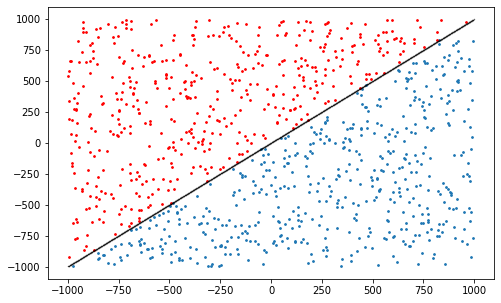

In [5]:
rede.plots()

In [6]:
entrada_txt = 'data0.txt'
tx_aprendizados = [0.4,0.1,0.01]
vrandoms = [[-100,100],[-0.5,0.5]]
pt = PrettyTable()
pt.align = "c"
pt.field_names = ["Taxa de Aprendizado", "Intervalo de Pesos", "Media dos Ajustes", "Desvio Padrão dos Ajustes",
                  'Menor número de épocas']
for  tx in tx_aprendizados:
    for v_random in vrandoms:
        ajustes_t = []
        epcs_t = []
        media_ajustes =0
        #print('Taxa de aprendizado: ',tx)
        #print('Intervalo de Pesos: ',v_random)
        for i in range(10):
            
            rede1 = Perc(entrada=entrada_txt,f=0,w0=-1,apz=tx,vetori=v_random)
            rede1.treino()
            k = rede1.n_ajust
            m = rede1.n_epc
            ajustes_t.append(k)
            epcs_t.append(m)
        #print(ajustes_t,'\n',epcs_t)
        
        pt.add_row([tx, v_random, np.mean(ajustes_t), np.std(ajustes_t),min(epcs_t)])
        
print(pt)
        

+---------------------+--------------------+-------------------+---------------------------+------------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Media dos Ajustes | Desvio Padrão dos Ajustes | Menor número de épocas |
+---------------------+--------------------+-------------------+---------------------------+------------------------+
|         0.4         |    [-100, 100]     |       258.2       |     143.33931770452932    |           4            |
|         0.4         |    [-0.5, 0.5]     |        6.4        |     1.4966629547095764    |           3            |
|         0.1         |    [-100, 100]     |       908.9       |      687.315422495378     |           6            |
|         0.1         |    [-0.5, 0.5]     |        8.7        |     7.1000000000000005    |           2            |
|         0.01        |    [-100, 100]     |       9292.9      |     8218.494514812308     |           37           |
|         0.01        |    [-0.5, 0.5]     |        69.9

    -- Como podemos verificar na tabela, Realizar a aprendizagem com Intervalos altos (-100,+100 - no exemplo), resulta em maior número de Ajustes, mas nem sempre reflete na quantidade de números de épocas.
    -- O pior caso realizado, e presente na tabela, é no caso onde há uma taxa de aprendizado baixa (0.01) e um Intervalo de pesos alta (-100,+100), com as maiores médias e desvios padrões.
    -- Utilizando intervalo de pesos menores (-0.5,+0.5), podemos verificar resultados melhores. Nos testes, utilizando este intervalo com as taxas T1= 0.1 e T2= 0.4, não podemos citar que um se sobressai melhor que outro, pois houve testes onde as Médias,DP e Épocas de T1 foram melhores que T2, mas também ocorreu o inverso em outra iteração.
    -- Utilizando um intervalo de pesos relativamente baixo (-0.5,+0.5) com uma Taxa de Aprendizado baixa (0.01), podemos verificar um aumento na quantidade de Ajustes, que se comparado, com taxas de aprendizado maiores (0.1 e 0.4), com o mesmo intervalo de pesos, são elevados.